In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('daily-website-visitors.csv')

In [3]:
data['Date'] = data['Date'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [4]:
data.set_index(data['Date'] ,inplace=True)
data.index = data.index.to_period('D') 

In [5]:
data.drop(['Date'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2167 entries, 2014-09-14 to 2020-08-19
Freq: D
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Page.Loads         2167 non-null   object
 4   Unique.Visits      2167 non-null   object
 5   First.Time.Visits  2167 non-null   object
 6   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(5)
memory usage: 135.4+ KB


In [7]:
data['Page.Loads'] = data['Page.Loads'].map(lambda x: int(x.replace(',', '')))
data['Unique.Visits'] = data['Unique.Visits'].map(lambda x: int(x.replace(',', '')))
data['First.Time.Visits'] = data['First.Time.Visits'].map(lambda x: int(x.replace(',', '')))
data['Returning.Visits'] = data['Returning.Visits'].map(lambda x: int(x.replace(',', '')))

In [8]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

In [9]:
# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

[Text(0.5, 0, 'Fecha'),
 Text(0, 0.5, 'Cantidad de cargas'),
 Text(0.5, 1.0, 'Cantidad de cargas a lo largo del tiempo')]

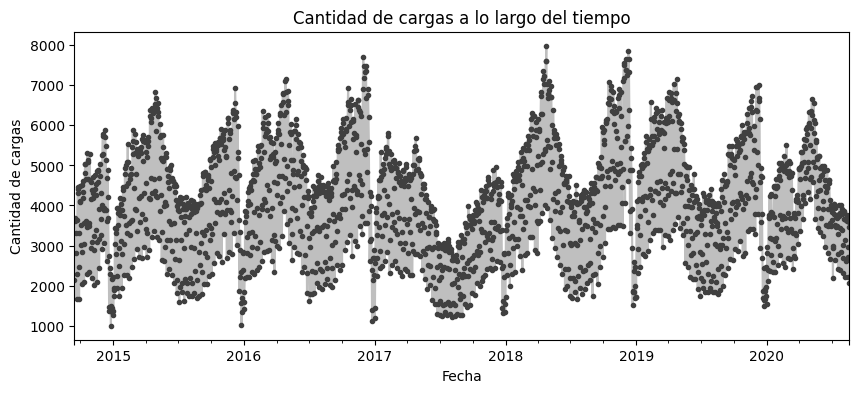

In [40]:
plt.figure(figsize=(10,4))
data['Page.Loads'].plot( **plot_params).set(xlabel='Fecha', ylabel='Cantidad de cargas', title='Cantidad de cargas a lo largo del tiempo')

In [11]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['day_of_year'] = data.index.day_of_year
data['week'] = data.index.week
data['Year-week'] = data['Year'].astype(str) + '-' + data['week'].astype(str)

In [12]:
data.head()

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Year,Month,day_of_year,week,Year-week
Date,,,,,,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152,2014,9,257,37,2014-37
2014-09-15,2,Monday,2,3621,2528,2297,231,2014,9,258,38,2014-38
2014-09-16,3,Tuesday,3,3698,2630,2352,278,2014,9,259,38,2014-38
2014-09-17,4,Wednesday,4,3667,2614,2327,287,2014,9,260,38,2014-38
2014-09-18,5,Thursday,5,3316,2366,2130,236,2014,9,261,38,2014-38


In [13]:
data.describe()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Year,Month,day_of_year,week
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.00000,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.997231,4116.989386,2943.646516,2431.824181,511.822335,2017.16982,6.498846,182.403323,26.484541
std,625.703338,2.000229,1350.977843,977.886472,828.704688,168.736370,1.75318,3.462485,105.819088,15.114784
min,1.000000,1.000000,1002.000000,667.000000,522.000000,133.000000,2014.00000,1.000000,1.000000,1.000000
25%,542.500000,2.000000,3114.500000,2226.000000,1830.000000,388.500000,2016.00000,3.500000,91.000000,13.000000
50%,1084.000000,4.000000,4106.000000,2914.000000,2400.000000,509.000000,2017.00000,6.000000,181.000000,26.000000
75%,1625.500000,6.000000,5020.500000,3667.500000,3038.000000,626.500000,2019.00000,10.000000,275.000000,40.000000
max,2167.000000,7.000000,7984.000000,5541.000000,4616.000000,1036.000000,2020.00000,12.000000,366.000000,53.000000


array([[<Axes: title={'center': 'Row'}>,
        <Axes: title={'center': 'Day.Of.Week'}>,
        <Axes: title={'center': 'Page.Loads'}>],
       [<Axes: title={'center': 'Unique.Visits'}>,
        <Axes: title={'center': 'First.Time.Visits'}>,
        <Axes: title={'center': 'Returning.Visits'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'day_of_year'}>],
       [<Axes: title={'center': 'week'}>, <Axes: >, <Axes: >]],
      dtype=object)

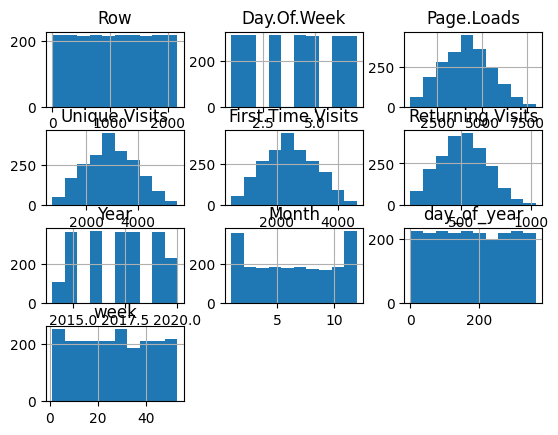

In [14]:
data.hist()

[Text(0.5, 0, 'Día de la semana'),
 Text(0, 0.5, 'Cantidad de cargas'),
 Text(0.5, 1.0, 'Cantidad de cargas (superposición semanal)')]

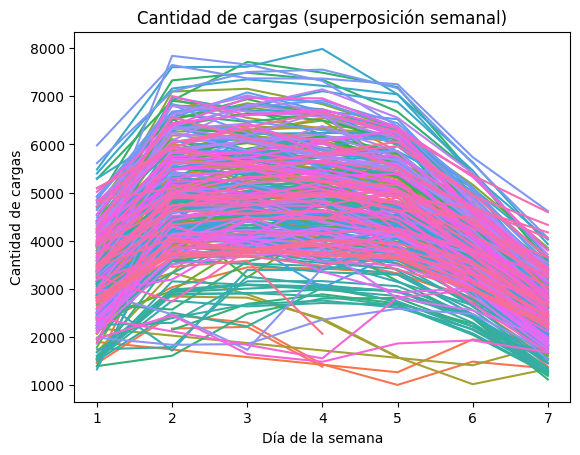

In [48]:
sns.lineplot(x = 'Day.Of.Week', y = 'Page.Loads', data=data, hue='Year-week', legend=False).set(xlabel='Día de la semana', ylabel='Cantidad de cargas', title='Cantidad de cargas (superposición semanal)')

[Text(0.5, 0, 'Día del año'),
 Text(0, 0.5, 'Cantidad de cargas'),
 Text(0.5, 1.0, 'Cantidad de cargas (superposición anual)')]

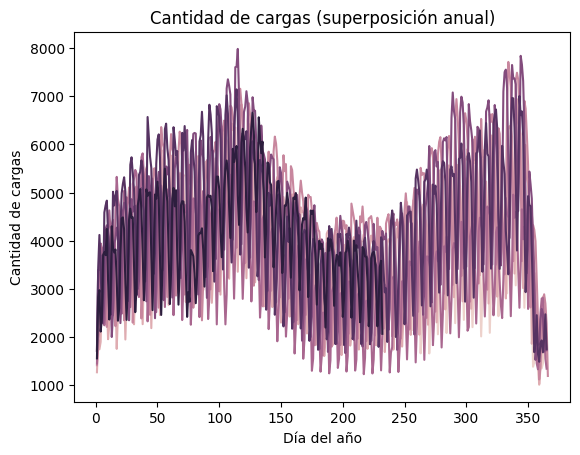

In [46]:

sns.lineplot(x = 'day_of_year', y = 'Page.Loads', data=data, hue='Year', legend=False).set(xlabel='Día del año', ylabel='Cantidad de cargas', title='Cantidad de cargas (superposición anual)')

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

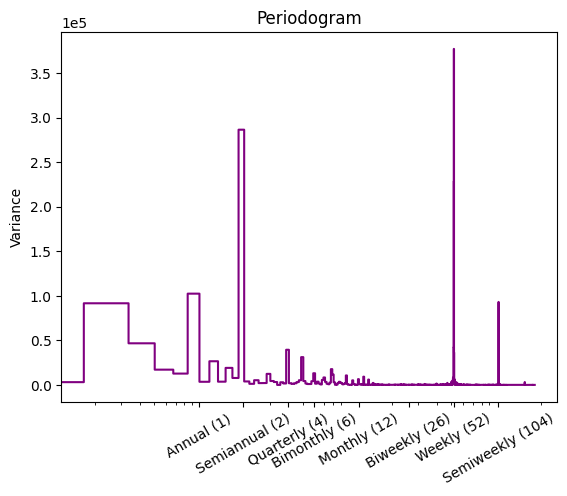

In [49]:
plot_periodogram(data['Page.Loads'])

In [18]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)

dp = DeterministicProcess(
    index=data.index,
    constant=False,              
    order=3,                     
    seasonal=True,               
    additional_terms=[fourier],  
    drop=True,                   
)

X = dp.in_sample()  

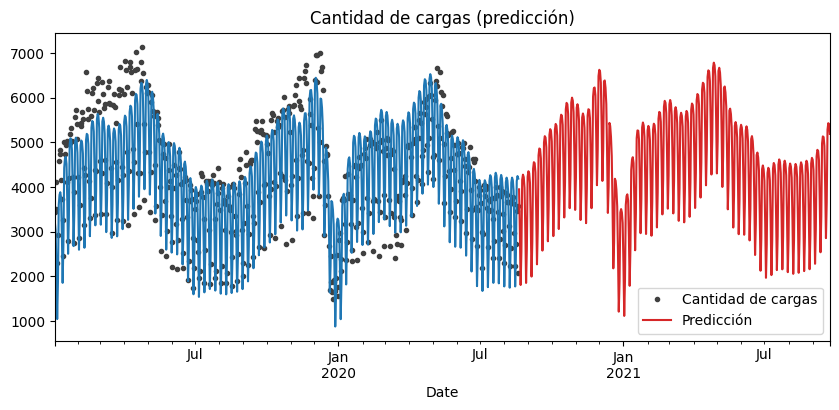

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
y = data['Page.Loads']

model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=400)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)
plt.figure(figsize=(10,4))
year = 2019
ax = y[y.index.to_timestamp() > datetime(year, 1, 1)].plot(color='0.25', style='.', title="Cantidad de cargas (predicción)", label= 'Cantidad de cargas')
ax = y_pred[y_pred.index.to_timestamp() > datetime(year, 1, 1)].plot(ax=ax)
ax = y_fore[y_fore.index.to_timestamp() > datetime(year, 1, 1)].plot(ax=ax, label="Predicción", color='C3')
_ = ax.legend()

In [20]:
model.score(X, y)

0.8027184761918714

/tmp/ipykernel_14083/3690271726.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataAux = data.drop(['Year', 'Month', 'day_of_year', 'week', 'Row'], axis=1).corr()


<Axes: >

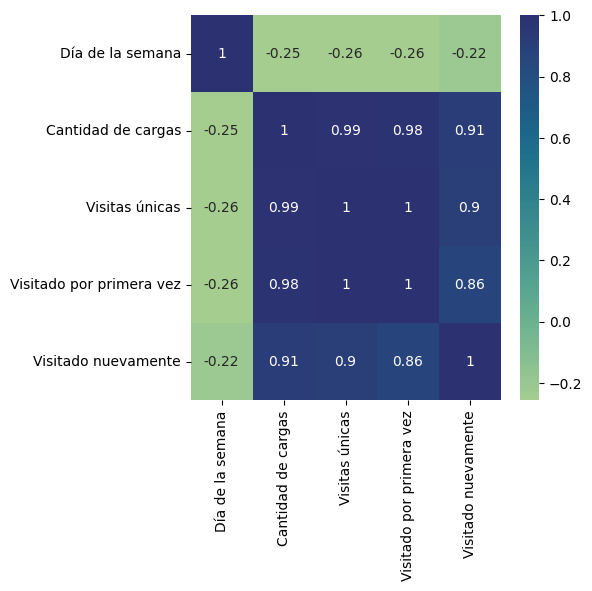

In [36]:
plt.figure(figsize=(5,5))
# sns.heatmap(data.drop(['Year', 'Month', 'day_of_year', 'week', 'Row'], axis=1).corr(), annot=True)
dataAux = data.drop(['Year', 'Month', 'day_of_year', 'week', 'Row'], axis=1).corr()
dataAux.columns = ['Día de la semana', 'Cantidad de cargas', 'Visitas únicas', 'Visitado por primera vez', 'Visitado nuevamente']
dataAux.index =  ['Día de la semana', 'Cantidad de cargas', 'Visitas únicas', 'Visitado por primera vez', 'Visitado nuevamente']
sns.heatmap(dataAux, annot=True, cmap="crest")